In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import os
import pyprism
import matplotlib.pyplot as plt

In [3]:
adata = ad.read_h5ad("samples_mutations_unique-vars")

IsADirectoryError: [Errno 21] Unable to open file (file read failed: time = Thu Oct 17 07:39:50 2024
, filename = 'samples_mutations_unique-vars', file descriptor = 71, errno = 21, error message = 'Is a directory', buf = 0x16b4e9140, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

In [4]:
df = pd.read_hdf("mutations.h5pd")

In [5]:
luad_kras_samples = df[(df["project"]=="LUAD") & (df["gene_ensemble_id"]=="ENSG00000133703")]

In [6]:
luad_kras_samples

,index,gene_ensemble_id,?1,?2,?3,position,base1,base2,tissue_source_site,participant,sample,vial,portion,analyte,plate,center,barcode,patient_barcode,project
426159,426159,ENSG00000133703,61,Q,L,12:25380276,T,A,64,5775,01,A,01,D,1625,08,TCGA-64-5775-01A-01D-1625-08,TCGA-64-5775,LUAD
426160,426160,ENSG00000133703,33,D,E,12:25398220,A,T,95,7039,01,A,11,D,1945,08,TCGA-95-7039-01A-11D-1945-08,TCGA-95-7039,LUAD
426161,426161,ENSG00000133703,12,G,V,12:25398284,C,A,05,4390,01,A,02,D,1753,08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4390,LUAD
426162,426162,ENSG00000133703,12,G,V,12:25398284,C,A,05,4395,01,A,01,D,1265,08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4395,LUAD
426163,426163,ENSG00000133703,12,G,V,12:25398284,C,A,05,4433,01,A,22,D,1855,08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-4433,LUAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426226,426226,ENSG00000133703,12,G,C,12:25398285,C,A,86,7713,01,A,11,D,2063,08,TCGA-86-7713-01A-11D-2063-08,TCGA-86-7713,LUAD
426227,426227,ENSG00000133703,12,G,C,12:25398285,C,A,91,6849,01,A,11,D,1945,08,TCGA-91-6849-01A-11D-1945-08,TCGA-91-6849,LUAD
426228,426228,ENSG00000133703,12,G,C,12:25398285,C,A,93,7347,01,A,11,D,2184,08,TCGA-93-7347-01A-11D-2184-08,TCGA-93-7347,LUAD
426229,426229,ENSG00000133703,12,G,C,12:25398285,C,A,97,7938,01,A,11,D,2167,08,TCGA-97-7938-01A-11D-2167-08,TCGA-97-7938,LUAD


In [7]:
luad_kras_patient_codes = list(luad_kras_samples["patient_barcode"])

In [8]:
len(luad_kras_patient_codes)

72

In [9]:
cell_state_fractions_mutated = []
cell_state_fractions_nonmutated = []
for file_name in os.listdir("deconvolution_results/LUAD"):
    if file_name.endswith(".h5ad") and file_name[:12] in luad_kras_patient_codes:
        dr = ad.read_h5ad(f"deconvolution_results/LUAD/{file_name}")
        cell_state_fractions_mutated.append(pyprism.deconvolution.calculate_fractions(dr))
    elif file_name.endswith(".h5ad") and file_name[:12] not in luad_kras_patient_codes:
        dr = ad.read_h5ad(f"deconvolution_results/LUAD/{file_name}")
        cell_state_fractions_nonmutated.append(pyprism.deconvolution.calculate_fractions(dr))
    else:
        print(file_name)
cell_state_fractions_mutated = np.concatenate(cell_state_fractions_mutated, axis=1)
cell_state_fractions_nonmutated = np.concatenate(cell_state_fractions_nonmutated, axis=1)

.metadata.md


In [10]:
cell_state_fractions_mutated

array([[1.72170463e-09, 5.12446700e-08, 6.63605999e-05, ...,
        9.99511136e-08, 1.19310867e-08, 2.60135626e-06],
       [2.94116087e-08, 2.96226936e-07, 1.15961302e-03, ...,
        1.37868275e-07, 3.70079501e-07, 2.54989604e-05],
       [8.74469474e-09, 4.24962917e-08, 5.23974268e-04, ...,
        1.01547069e-07, 7.12840651e-08, 1.13383184e-05],
       ...,
       [3.55529713e-50, 2.49450513e-20, 9.58366433e-12, ...,
        1.40461674e-04, 3.09510219e-19, 1.91525596e-06],
       [1.34468289e-14, 9.34815567e-15, 4.88356605e-09, ...,
        1.12987647e-11, 2.16099068e-10, 1.52557620e-06],
       [3.09590591e-44, 5.77563340e-16, 1.05350714e-07, ...,
        8.03931520e-04, 1.31750173e-15, 1.58502244e-03]])

In [11]:
cell_state_fractions_nonmutated

array([[1.43859697e-06, 2.40435081e-05, 5.64053582e-09, ...,
        3.18935534e-09, 6.26870883e-09, 1.62620679e-04],
       [6.19886857e-05, 1.58199717e-04, 9.36402431e-08, ...,
        2.05245159e-07, 8.87667675e-08, 4.56318360e-04],
       [9.20644844e-06, 2.23472752e-04, 4.19100403e-08, ...,
        2.72012745e-08, 1.06432857e-08, 1.45668440e-03],
       ...,
       [2.37484348e-40, 1.05869089e-02, 8.81479800e-03, ...,
        2.53296539e-16, 2.11833633e-56, 1.87322555e-04],
       [1.62439561e-07, 2.06997636e-05, 9.03797402e-09, ...,
        3.17667255e-05, 6.47342876e-13, 6.10052770e-06],
       [1.57235555e-34, 1.64014456e-02, 7.62556789e-03, ...,
        1.63483373e-13, 1.46669138e-48, 3.87479227e-02]])

In [12]:
mean_cell_state_fractions_mutated = cell_state_fractions_mutated.mean(axis=1)
mean_cell_state_fractions_nonmutated = cell_state_fractions_nonmutated.mean(axis=1)
error_cell_state_fractions_mutated = cell_state_fractions_mutated.std(axis=1) / np.sqrt(len(mean_cell_state_fractions_mutated))
error_cell_state_fractions_nonmutated = cell_state_fractions_nonmutated.std(axis=1)  / np.sqrt(len(mean_cell_state_fractions_nonmutated))

In [13]:
cell_state_names = ad.read_h5ad("references/LUAD/LUAD_ref.h5ad").var_names

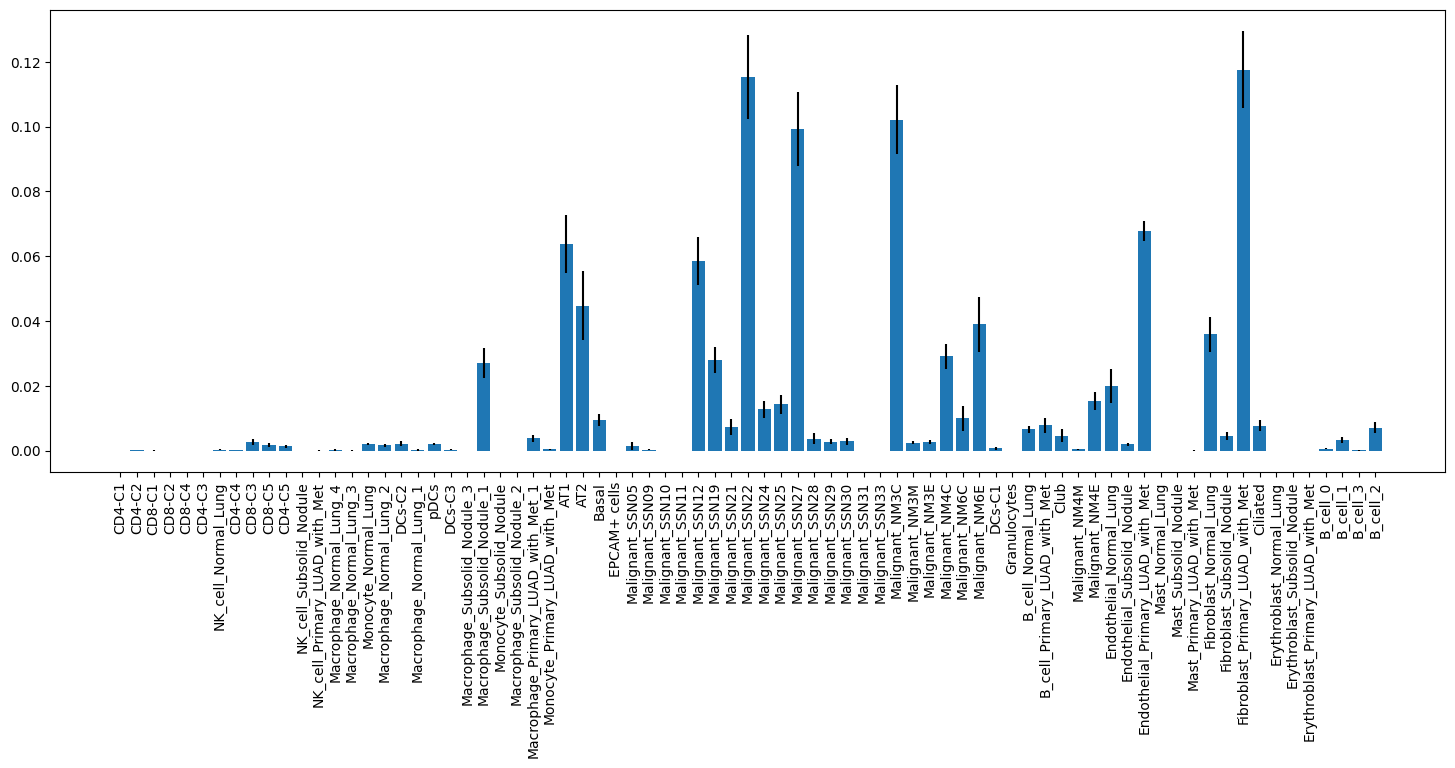

In [14]:
plt.figure(figsize=(18, 6))
plt.bar(x=cell_state_names, height=mean_cell_state_fractions_mutated, yerr=error_cell_state_fractions_mutated)
plt.xticks(rotation=90)
plt.show()

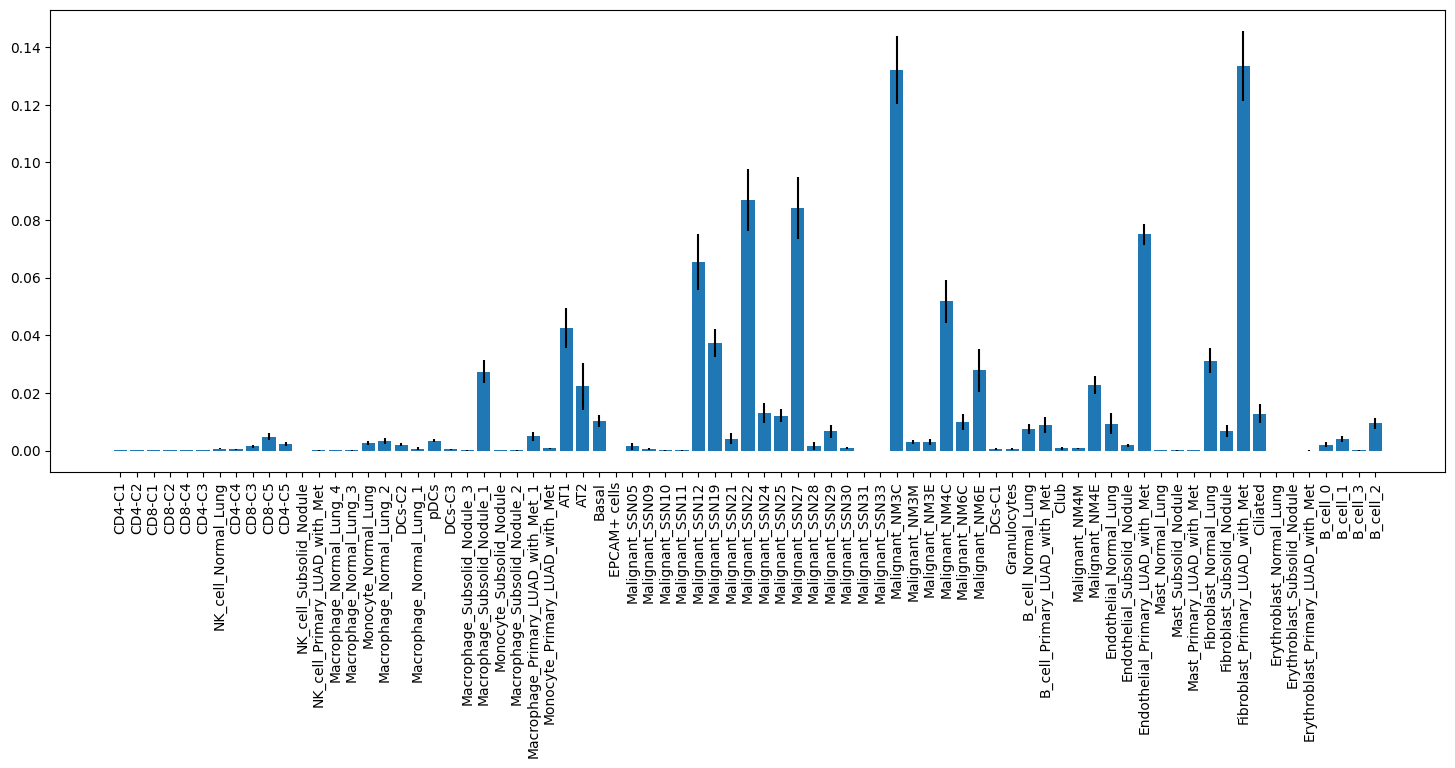

In [15]:
plt.figure(figsize=(18, 6))
plt.bar(cell_state_names, height=mean_cell_state_fractions_nonmutated, yerr=error_cell_state_fractions_nonmutated)
plt.xticks(rotation=90)
plt.show()

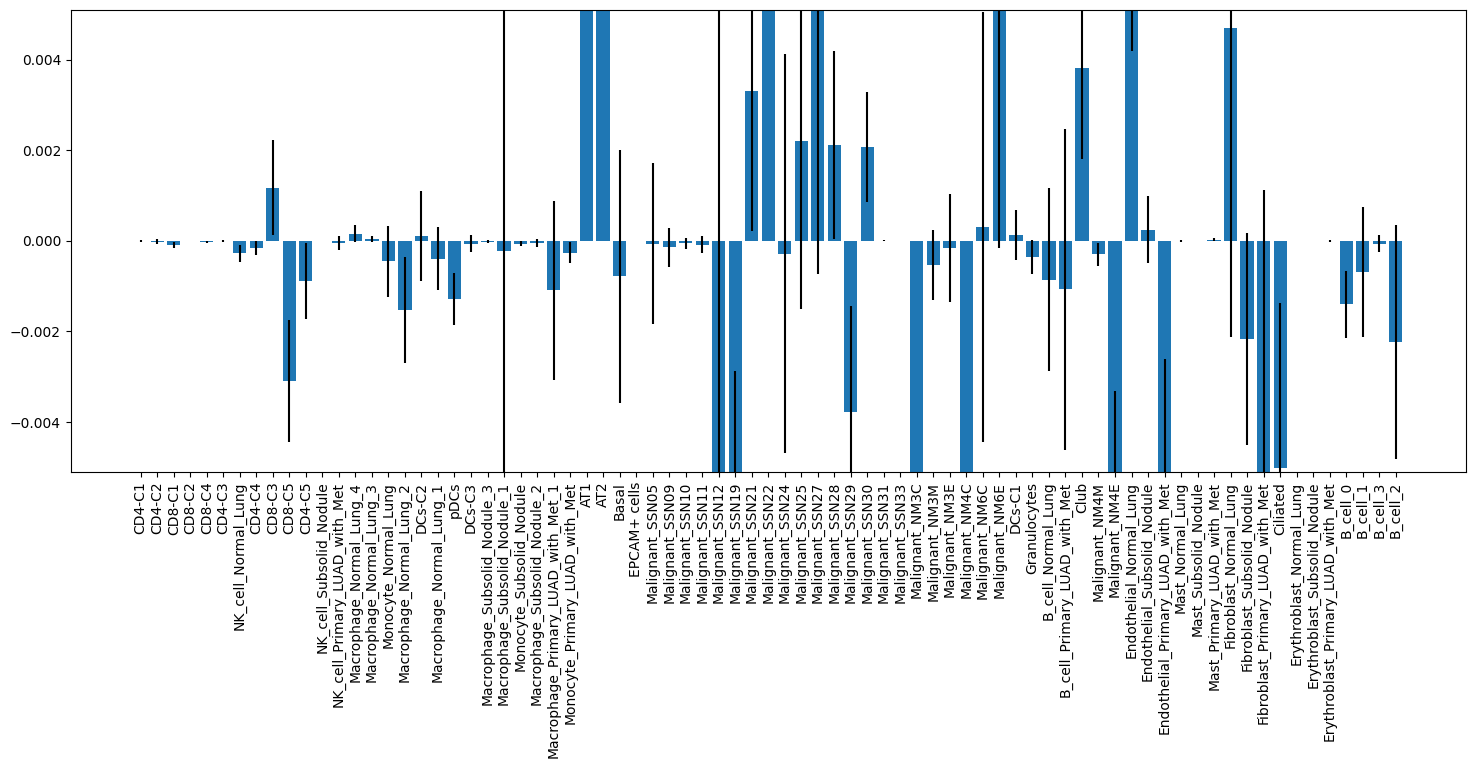

In [16]:
plt.show()
plt.figure(figsize=(18, 6))
plt.bar(cell_state_names, height=mean_cell_state_fractions_mutated - mean_cell_state_fractions_nonmutated, yerr=np.sqrt(error_cell_state_fractions_mutated**2 + error_cell_state_fractions_nonmutated**2))
plt.xticks(rotation=90)
plt.ylim(-0.0051, 0.0051)
plt.show()

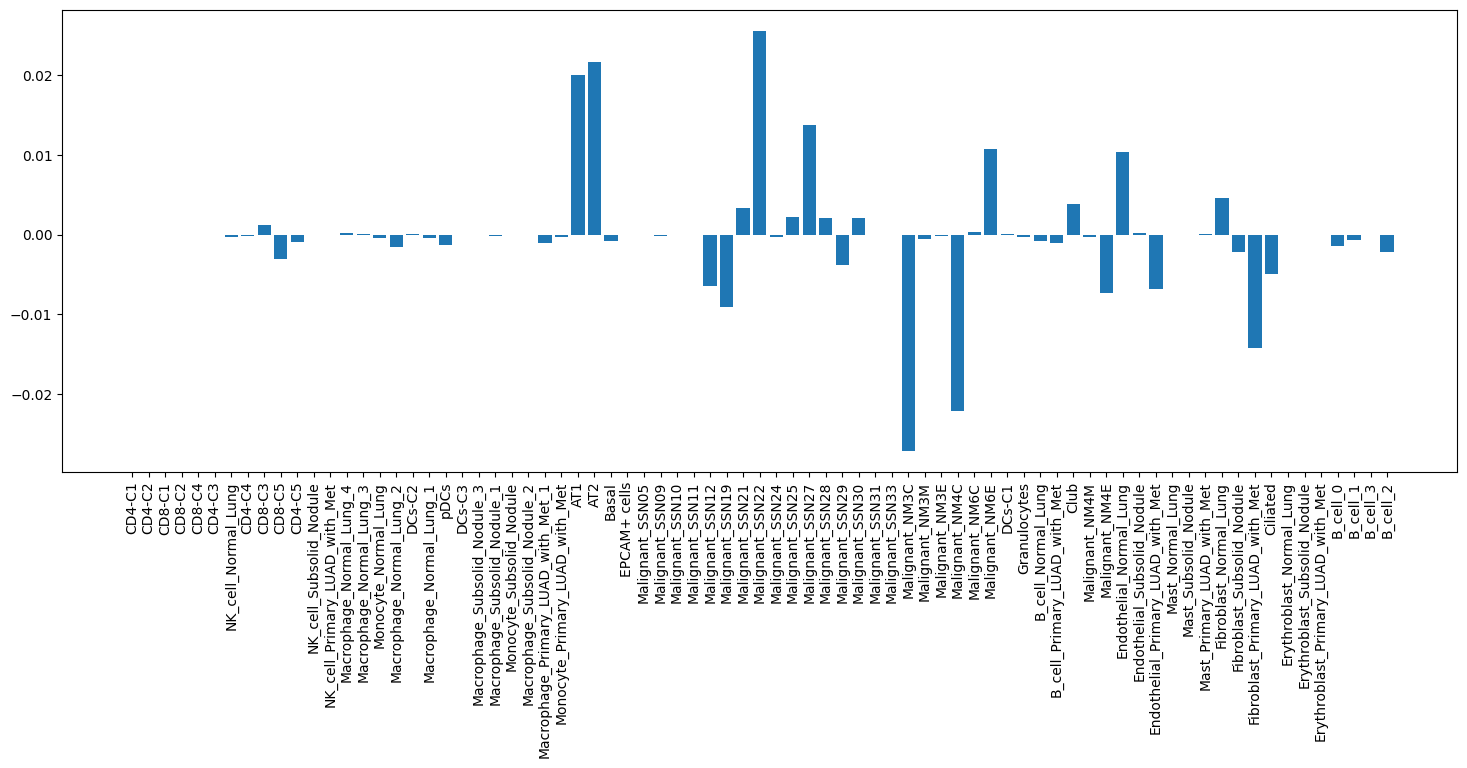

In [17]:
plt.show()
plt.figure(figsize=(18, 6))
plt.bar(cell_state_names, height=(mean_cell_state_fractions_mutated - mean_cell_state_fractions_nonmutated)/ (mean_cell_state_fractions_mutated+1))
plt.xticks(rotation=90)
plt.show()

In [18]:
partition_map = ad.read_h5ad("references/LUAD/LUAD_ref.h5ad").uns['cell_state_to_cell_type_dict']

In [19]:
epithelial_fraction = 0
epithelial_error = 0
for name, value, error in zip(cell_state_names, mean_cell_state_fractions_mutated - mean_cell_state_fractions_nonmutated, np.sqrt(error_cell_state_fractions_mutated**2 + error_cell_state_fractions_nonmutated**2)):
    epithelial_cell_states = ad.read_h5ad("references/LUAD/LUAD_ref.h5ad").uns["cell_state_to_cell_type_dict"]["Epithelial"]
    if name in epithelial_cell_states:
        print(name, value)
        epithelial_fraction += value
        epithelial_error += error**2
epithelial_error = np.sqrt(epithelial_error)
print(epithelial_fraction, epithelial_error, epithelial_fraction/epithelial_error)

AT1 0.021226612405108418
AT2 0.022542718851446354
Basal -0.0007843701002437659
EPCAM+ cells -3.0963915873357674e-14
Club 0.003817780078705154
Ciliated -0.005011281668433646
0.04179145956655155 0.018339306084587913 2.278791758739034


In [20]:
def aggregate_cell_state_means_to_cell_type_means(cell_state_means: np.array, cell_state_names: np.array, partition_map: dict):
    cell_state_means = np.array(cell_state_means)
    cell_state_names = np.array(cell_state_names)
    cell_type_means = {}
    for cell_type in partition_map.keys():
        cell_type_means[cell_type] = 0
        for name, mean in zip(cell_state_names, cell_state_means):
            if name in partition_map[cell_type]:
                cell_type_means[cell_type] += mean
    
    return cell_type_means

mean_cell_type_factions_mutated = aggregate_cell_state_means_to_cell_type_means(mean_cell_state_fractions_mutated, cell_state_names, partition_map)
mean_cell_type_factions_nonmutated = aggregate_cell_state_means_to_cell_type_means(mean_cell_state_fractions_nonmutated, cell_state_names, partition_map)

In [21]:
def aggregate_cell_state_means_to_cell_type_means(cell_state_errors: np.array, cell_state_names: np.array, partition_map: dict):
    cell_state_errors = np.array(cell_state_errors)
    cell_state_names = np.array(cell_state_names)
    cell_type_errors = {}
    for cell_type in partition_map.keys():
        cell_type_errors[cell_type] = 0
        for name, error in zip(cell_state_names, cell_state_errors):
            if name in partition_map[cell_type]:
                cell_type_errors[cell_type] += error**2
        cell_type_errors[cell_type] = np.sqrt(cell_type_errors[cell_type])
    
    return cell_type_errors

error_cell_type_factions_mutated = aggregate_cell_state_means_to_cell_type_means(error_cell_state_fractions_mutated, cell_state_names, partition_map)
error_cell_type_factions_nonmutated = aggregate_cell_state_means_to_cell_type_means(error_cell_state_fractions_nonmutated, cell_state_names, partition_map)

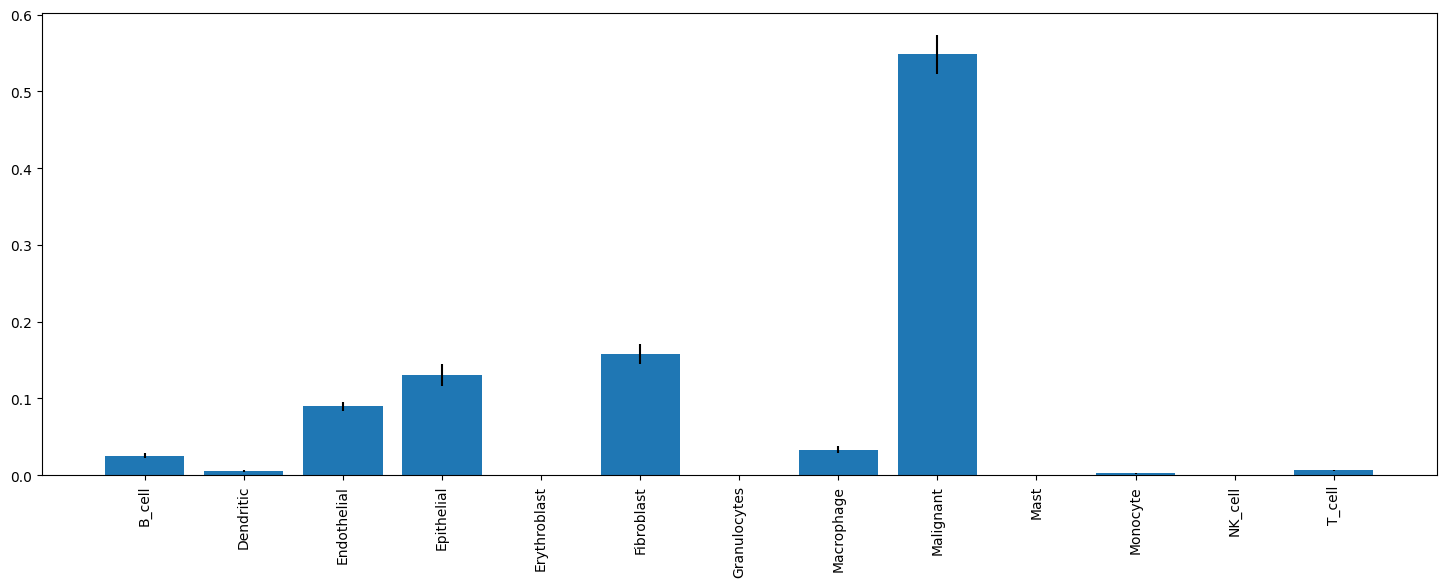

In [22]:
plt.figure(figsize=(18, 6))
plt.bar(x=mean_cell_type_factions_mutated.keys(), height=mean_cell_type_factions_mutated.values(), yerr=error_cell_type_factions_mutated.values())
plt.xticks(rotation=90)
plt.show()

In [23]:
df = pd.concat([
    pd.DataFrame(mean_cell_type_factions_nonmutated.values(), index=mean_cell_type_factions_nonmutated.keys(), columns=["nonmutated"]),
    pd.DataFrame(mean_cell_type_factions_mutated.values(), index=mean_cell_type_factions_mutated.keys(), columns=["mutated"]),
    pd.DataFrame(error_cell_type_factions_nonmutated.values(), index=error_cell_type_factions_nonmutated.keys(), columns=["nonmutated_error"]),
    pd.DataFrame(error_cell_type_factions_mutated.values(), index=error_cell_type_factions_mutated.keys(), columns=["mutated_error"])
], axis=1)

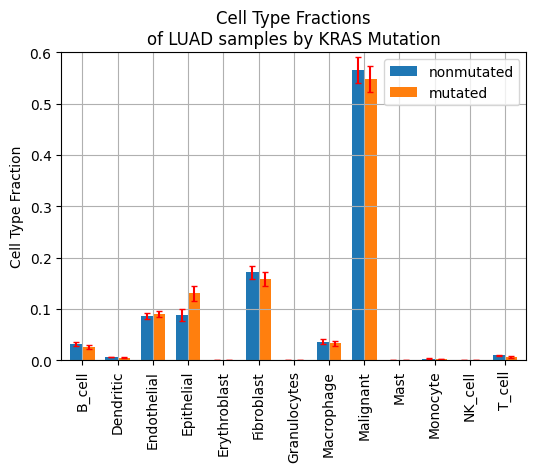

In [35]:
ax = df[["nonmutated", "mutated"]].plot.bar(figsize=(6,4), width=0.7)
plt.title("Cell Type Fractions\nof LUAD samples by KRAS Mutation")
plt.grid()
plt.ylabel("Cell Type Fraction")
plt.ylim(0, 0.6)
patches_heights = [patch.get_height() for patch in ax.patches]
patches_x = np.array([patch.get_x() for patch in ax.patches])
patches_width = np.array([patch.get_width() for patch in ax.patches])
plt.errorbar(patches_x + patches_width/2, patches_heights, pd.concat([df["nonmutated_error"], df["mutated_error"]]), linestyle='none', marker='', capsize=2.5, color='r')
plt.savefig("LUAD-KRAS-cell-type-fraction", bbox_inches='tight', dpi=600)
plt.show()

In [25]:
df = pd.concat([
    pd.DataFrame(mean_cell_state_fractions_nonmutated.values(), index=mean_cell_type_factions_nonmutated.keys(), columns=["nonmutated"]),
    pd.DataFrame(mean_cell_type_factions_mutated.values(), index=mean_cell_type_factions_mutated.keys(), columns=["mutated"]),
    pd.DataFrame(error_cell_type_factions_nonmutated.values(), index=error_cell_type_factions_nonmutated.keys(), columns=["nonmutated_error"]),
    pd.DataFrame(error_cell_type_factions_mutated.values(), index=error_cell_type_factions_mutated.keys(), columns=["mutated_error"])
], axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [27]:
df2 = pd.DataFrame([
    mean_cell_state_fractions_mutated,
    mean_cell_state_fractions_nonmutated,
    error_cell_state_fractions_mutated,
    error_cell_state_fractions_nonmutated
]).T
df2.rename(columns={0: "mean_mutated", 1: "mean_nonmutated", 2: "error_mutated", 3: "error_nonmutated"}, inplace=True)
df2.set_index(cell_state_names, inplace=True)
df2 = df2.loc[["AT1", "AT2", "Basal", "EPCAM+ cells", "Club", "Ciliated"], :]
df2

,mean_mutated,mean_nonmutated,error_mutated,error_nonmutated
AT1,6.381939e-02,4.259277e-02,9.081817e-03,7.016456e-03
AT2,4.479085e-02,2.224813e-02,1.069333e-02,8.066721e-03
Basal,9.423001e-03,1.020737e-02,1.894132e-03,2.052991e-03
EPCAM+ cells,1.232880e-15,3.219680e-14,1.153739e-15,5.298904e-14
Club,4.608239e-03,7.904586e-04,1.967185e-03,4.689036e-04
Ciliated,7.794212e-03,1.280549e-02,1.753948e-03,3.198780e-03


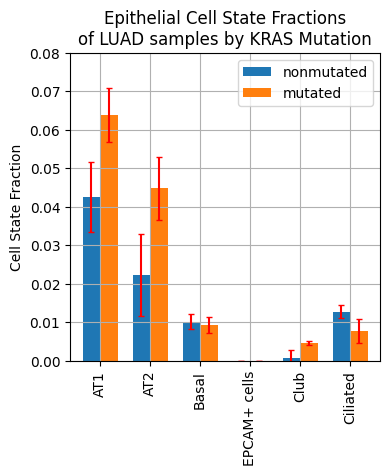

In [30]:
ax = df2[["mean_nonmutated", "mean_mutated"]].plot.bar(figsize=(4, 4), width=0.7)
ax.legend(labels=["nonmutated", "mutated"])
plt.title("Epithelial Cell State Fractions\nof LUAD samples by KRAS Mutation")
plt.ylabel("Cell State Fraction")
plt.ylim(0, 0.08)
plt.grid()
patches_heights = [patch.get_height() for patch in ax.patches]
patches_x = np.array([patch.get_x() for patch in ax.patches])
patches_width = np.array([patch.get_width() for patch in ax.patches])
plt.errorbar(patches_x + patches_width/2, patches_heights, pd.concat([df2["error_mutated"], df2["error_nonmutated"]]), linestyle='none', marker='', capsize=2, color='r')
plt.savefig("LUAD-KRAS-Epithelial-cell-state-fraction", bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
f